# Generating test data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Here, we generate test data and store them in the form of `.txt` files `test_data_linear.txt` and `test_data_quadratic.txt`, where:
- in `test_data_linear.txt`, data $(x_i, y_i)$ is generated according to $x_i \sim \mathcal{N} (\mu_i, \sigma_x)$ for $\mu_i \sim \textrm{Unif} (800, 2400)$ and $\sigma_x = 2$, and $y_i \sim (\eta_i, \sigma_y)$ for $\eta_i = a_0 + a_1 \mu_i$ and $\sigma_y = 0.1$. We'd like to recover parameter values $a_0 = -6.35 \times 10^1$ and $a_1 = 1.66 \times 10^{-2}$, and
- in `test_data_quadratic.txt`, data $(x_i, y_i)$ is generated according to $x_i \sim \mathcal{N} (\mu_i, \sigma_x)$ for $\mu_i \sim \textrm{Unif} (800, 2400)$ and $\sigma_x = 2$, and $y_i \sim (\eta_i, \sigma_y)$ for $\eta_i = a_0 + a_1 \mu_i + a_2 \mu_i^2$ and $\sigma_y = 0.1$. We'd like to recover parameter values $a_0 = -4.66 \times 10^1$, $a_1 = -7.47 \times 10^{-3}$, and $a_2 = 6.18 \times 10^{-6}$.

The $x$ data are depths in meters, and the $y$ data are ice temperature in $^\circ$C.

In [3]:
# defining depths
depths_means = np.random.rand(20)*1600+800
depths = np.random.normal(loc=depths_means, scale=2)
depths

array([2298.77792271, 1576.95221441, 1468.81348289, 1158.43167414,
       1079.41410887, 1647.38454803, 1750.86341428,  955.67687435,
       1904.96180851,  973.7305699 , 1615.79348968, 1618.27913137,
       1451.55458127, 1266.9801271 , 1873.05133468, 2206.71826218,
       1533.69936947, 1366.3720474 ,  901.2841438 ,  927.85924488])

In [4]:
# defining model parameters for linear and quadratic fit
a0_lin, a1_lin = -6.35e1, 1.66e-2
a0_quad, a1_quad, a2_quad = -4.66e1, -7.47e-3, 6.18e-6

In [5]:
# get linear temperatures
lin_temp_means = a0_lin + a1_lin*depths_means
lin_temps = np.random.normal(loc=lin_temp_means, scale=0.1)
lin_temps

array([-25.46157352, -37.14745871, -39.21766591, -44.33455151,
       -45.52103215, -36.10437554, -34.57482545, -47.70775134,
       -31.79857712, -47.2854397 , -36.71902152, -36.57365514,
       -39.56659586, -42.30586228, -32.53366336, -26.89787   ,
       -38.2652859 , -40.68048004, -48.48322678, -47.98797089])

In [6]:
# get quadratic temperatures
quad_temp_means = a0_quad + a1_quad*depths_means + a2_quad*depths_means**2
quad_temps = np.random.normal(loc=quad_temp_means, scale=0.1)
quad_temps

array([-31.04370335, -42.95249629, -44.0874997 , -47.04508432,
       -47.51241156, -42.11858048, -40.87588958, -47.98770145,
       -38.16309116, -48.23518409, -42.74581508, -42.49182683,
       -44.31500692, -46.1285935 , -38.83656552, -33.05576531,
       -43.54530586, -45.11700604, -48.21775727, -48.38337236])

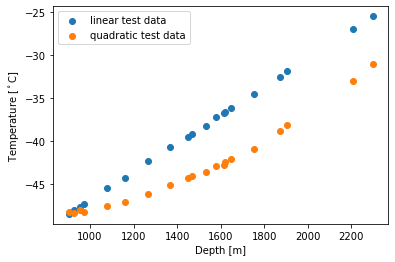

In [7]:
# plotting
plt.scatter(depths, lin_temps, label='linear test data')
plt.scatter(depths, quad_temps, label='quadratic test data')
plt.xlabel('Depth [m]')
plt.ylabel('Temperature [$^\\circ$C]')
plt.legend()
plt.show()

In [9]:
# write to txt files
lin_file = open('test_data_linear.txt', 'w+')
quad_file = open('test_data_quadratic.txt', 'w+')

for i, depth in enumerate(depths):
    lin_file.write(f'{lin_temps[i]}\t{depth}\n')
    quad_file.write(f'{quad_temps[i]}\t{depth}\n')

lin_file.close()
quad_file.close()